<a href="https://colab.research.google.com/github/vinitjethwa369/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction_using_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
data.shape

(10000, 14)

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [10]:
#Encoding the catogorical data

data = pd.get_dummies(data,drop_first=True)

In [11]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [12]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
data['Exited'].value_counts() # 0 = person not leaving the bank and 1 = person leaving the bank

0    7963
1    2037
Name: Exited, dtype: int64

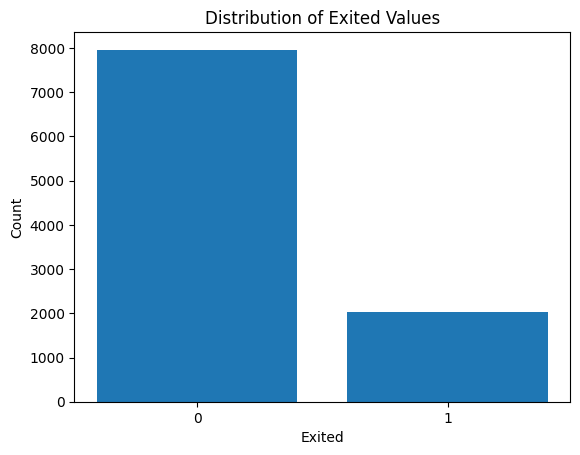

In [14]:


# Count the occurrences of each unique value in the 'Exited' column
exit_counts = data['Exited'].value_counts()

# Create a bar plot
plt.bar(exit_counts.index, exit_counts.values)

# Set labels and title
plt.title('Distribution of Exited Values')
plt.xlabel('Exited')
plt.ylabel('Count')

# Set x-axis ticks to represent the unique values
plt.xticks(exit_counts.index)

# Show the plot
plt.show()

#  exit_counts.values  #O/P array([7963, 2037])
#  exit_counts.index  #O/P Int64Index([0, 1], dtype='int64')



# Exited = Target class or target data set so now we need to balanced the target data set.



**Exited = Target class or target data set so now we need to balanced the target data set.**


In [15]:
x = data.drop('Exited' , axis=1)
y= data['Exited']


In [16]:
from sklearn.model_selection import train_test_split
# Assuming x and y are your features and target variable, respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=23, stratify=y) # as 0s and 1s values is imbalance stratify will balance them for model training

**Feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [18]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6768,599,42,6,0.00,2,1,0,113868.40,0,1,1
2346,518,46,4,113625.93,1,0,0,92727.42,1,0,1
4529,664,44,8,142989.69,1,1,1,115452.51,0,0,0
8166,542,37,8,0.00,1,1,1,807.06,0,1,1
1096,756,39,3,100717.85,3,1,1,73406.04,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4242,526,50,5,124233.24,1,0,1,159456.87,1,0,1
9694,581,25,5,77886.53,2,1,0,150319.49,0,0,1
5089,688,45,9,103399.87,1,0,0,129870.93,1,0,1
1906,786,29,4,0.00,2,1,0,103372.79,0,0,0


In [19]:
x_train =  sc.fit_transform(x_train)
x_test=  sc.fit_transform(x_test)

**Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [21]:
lr.fit(x_train,y_train)

LogisticRegression()

In [22]:
lr.predict(x_train)

array([0, 1, 0, ..., 0, 0, 0])

In [23]:
y_pred = lr.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # checking the accuracy score


0.8105

In [25]:
from sklearn.metrics import precision_score,recall_score, f1_score
precision_score(y_test,y_pred)


0.5933333333333334

In [26]:
recall_score(y_test,y_pred)

0.21867321867321868

In [27]:
f1_score(y_test,y_pred)

0.31956912028725315

**Handling Imbalanced Data With SMOTE by even distributing the majority class o and minority class 1**

as we know that our os and 1s data was inconsistence and we have checked it pratically that by using inconsistent data we are geting low accuracy

now we are handing the imbalance data below fro increassing the accuracy


In [28]:
from imblearn.over_sampling import SMOTE

x_res,y_res = SMOTE().fit_resample(x,y)

y_res.value_counts() # got 0's and 1's value same

1    7963
0    7963
Name: Exited, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
# Assuming x and y are your features and target variable, respectively
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.20, random_state=23) # removing stratify becaues the data is balanced now

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [31]:
x_train =  sc.fit_transform(x_train)
x_test=  sc.fit_transform(x_test)

**Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [33]:
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
lr.predict(x_train)

array([0, 1, 1, ..., 0, 1, 1])

In [35]:
y_pred = lr.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # checking the accuracy score


0.7718141870684243

In [37]:
from sklearn.metrics import precision_score,recall_score, f1_score
precision_score(y_test,y_pred)


0.7603715170278638

In [38]:
recall_score(y_test,y_pred)

0.7831632653061225

In [39]:
f1_score(y_test,y_pred)

0.7715991203267358

**Please check the difference before Handling Imbalanced Data With SMOTE and after we will find that its accuracy has been increased**

# Classifications


SVC - Support Vector Classifier

In [40]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [41]:
y_pred_svc = svm.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred_svc)

0.8210922787193974

KNeighbor Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [44]:
y_pred_knn = knn.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred_knn)

0.8094789704959197

In [46]:
precision_score(y_test,y_pred_knn)

0.798261949099938

Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [48]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = dt.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred_dt)

0.7878217200251099

In [51]:
precision_score(y_test,y_pred_dt)

0.781921618204804

Radom Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [53]:
y_pred_rf = rf.fit(x_train,y_train)

In [54]:
from sklearn.metrics import accuracy_score

# Assuming you have trained your RandomForestClassifier and obtained predictions
y_pred_rf = rf.predict(x_test)

# Now you can calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)


Accuracy: 0.8512241054613936


In [55]:
precision_score(y_test,y_pred_rf)

0.8475222363405337

Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

In [57]:
y_pred_gbc = gbc.fit(x_train,y_train)

In [58]:
from sklearn.metrics import accuracy_score

# Assuming gbc is your trained Gradient Boosting Classifier model
# Assuming x_test contains your test features and y_test contains your test labels

# Generate predictions using your trained model on the test data
y_pred_gbc = gbc.predict(x_test)

# Compute accuracy using the true labels (y_test) and the predicted labels (y_pred_gbc)
accuracy = accuracy_score(y_test, y_pred_gbc)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.8232893910860013


In [59]:
from sklearn.metrics import precision_score

# Assuming you have trained your GradientBoostingClassifier and obtained predictions
y_pred_gbc = gbc.predict(x_test)

# Now you can calculate the precision score
precision = precision_score(y_test, y_pred_gbc)
print("Precision:", precision)


Precision: 0.8239845261121856


In [60]:
from tabulate import tabulate

# Example data
data1 = [
    ["LR",accuracy_score(y_test, y_pred)*100],
    ["SVC",accuracy_score(y_test, y_pred_svc)*100],
    ["KNN",accuracy_score(y_test, y_pred_knn)*100],
    ["DT",accuracy_score(y_test, y_pred_dt)*100],
    ["RF",accuracy_score(y_test, y_pred_rf)*100],
    ["GBC", accuracy_score(y_test, y_pred_gbc)*100]
]

# Example headers
headers = ["Model", "ACC"]

# Print the table
print(tabulate(data1, headers=headers))



Model        ACC
-------  -------
LR       77.1814
SVC      82.1092
KNN      80.9479
DT       78.7822
RF       85.1224
GBC      82.3289


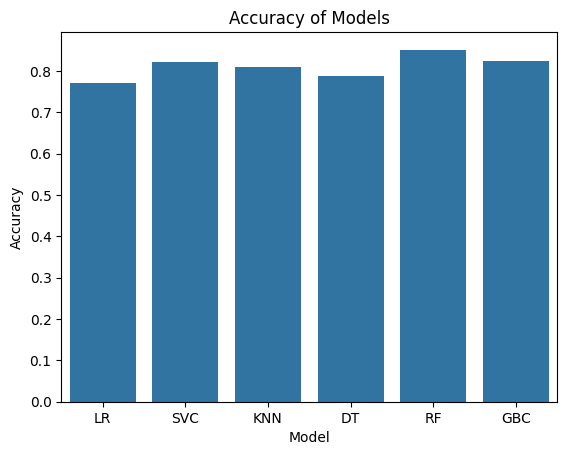

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_data is a pandas DataFrame with columns 'Model' and 'ACC'
# and you want to create a bar plot using seaborn

# Example data
final_data = pd.DataFrame({
    'Model' : ['LR','SVC','KNN','DT','RF','GBC'],
     'ACC': [accuracy_score(y_test, y_pred),
                       accuracy_score(y_test, y_pred_svc),
                       accuracy_score(y_test, y_pred_knn),
                       accuracy_score(y_test, y_pred_dt),
                       accuracy_score(y_test, y_pred_rf),
                       accuracy_score(y_test, y_pred_gbc)]
})

# Create a bar plot using seaborn
sns.barplot(x=final_data['Model'], y=final_data['ACC'])

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')

# Show the plot
plt.show()


In [62]:
x_res=sc.fit_transform(x_res)

In [63]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [64]:
import joblib

In [65]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [66]:
model = joblib.load('churn_predict_model')

In [69]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]]) # model predicted 1 , 0 = person not leaving the bank and 1 = person leaving the bank

array([1])